# Kernel PCA
1. Pick a kernel(polynomial, sigmoid, rbf)
2. Construct the normalized kernel matrix of the data(dimension: m by m)
3. Solve an eigenvalue problem
4. For any data point(new or old), we can represent it as linear combination form

아이리스 데이터를 불러온다.

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


X, y 변수 지정

In [ ]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

커널 행렬을 정의한다. 커널은 polynomial, sigmoid, rbf 중에 선택할 수 있다.

\begin{align}
\text{polynomial} & =\text{K}(x,y) = (x^{T}y+\text{C})^{d} \\[2.2ex]
\text{sigmoid} & = \text{K}(x,y) = \text{tanh}(\sigma x^{T}y + \text{C}) \\[1.2ex]
\text{rbf} & =\text{K}(x,y) = \text{exp}\left( -\frac{\|x-y\|_{2}^{2}}{2\sigma^{2}} \right) 
\end{align}

In [7]:
#define kernel matrix
def kernel_matrix(x, kernel=None, d=3, sigma=None, C=1.):
    
    n = x.shape[0]
    if sigma is None:
        sigma = 1./n
    
    xxt = x.dot(x.T)
    if kernel == 'polynomial':
        return (C + xxt)**d
    elif kernel == 'sigmoid':
        return np.tanh(sigma*xxt + C)
    elif kernel == 'rbf':
        A = x.dot(x.T)
        B = np.repeat(np.diag(xxt), n).reshape(n, n)
        return np.exp(-(B.T - 2*A + B)/(2*sigma**2))
    else:
        return xxt

■ Pick a kernel(polynomial, sigmoid, rbf)

아이리스 데이터의 커널 행렬을 구한다.
커널은 'polynomial' 커널을 선택하였다.

In [8]:
K = kernel_matrix(X, kernel='polynomial', sigma=0.2)
print(K.shape)
print(K)

(150, 150)
[[  70240.512376   57022.169049   55002.062627 ...,  143301.984337
   145034.127064  118298.461429]
 [  57022.169049   46694.890801   44701.078149 ...,  121508.031177
   122023.936      99961.946721]
 [  55002.062627   44701.078149   43095.878216 ...,  112748.588191
   114084.125      93082.856768]
 ..., 
 [ 143301.984337  121508.031177  112748.588191 ...,  577801.395289
   596522.410632  483182.234423]
 [ 145034.127064  122023.936     114084.125    ...,  596522.410632
   623930.478625  501701.826536]
 [ 118298.461429   99961.946721   93082.856768 ...,  483182.234423
   501701.826536  406210.479416]]


■ Construct the normalized kernel matrix of the data(dimension: m by m)

커널 공간에서 데이터를 표준화시키기 위해 커널 행렬을 다음의 식을 이용하여 Gram 행렬로 바꿔준다.

\begin{align}
\tilde{\mathbf{K}} & = (\mathbf{I}_{n}-\mathbf{1}_{n})\mathbf{K}(\mathbf{I}_{n}-\mathbf{1}_{n}) \\
& = \mathbf{K} - \mathbf{1}_{n}\mathbf{K} - \mathbf{K}\mathbf{1}_{n} + \mathbf{1}_{n}\mathbf{K}\mathbf{1}_{n}
\end{align}

■ Solve an eigenvalue problem

이 Gram 행렬을 다음과 같이 eigenvalue decompotison 한다.
\begin{align}
\tilde{\mathbf{K}} \alpha_{k} = N\lambda_{k}\alpha_{k}
\end{align}

여기서 $\alpha_{k}$는 $\tilde{\mathbf{K}}$의 k번째 eigenvector, $\lambda_{k}$는 k번째 eigenvalue이다.

In [9]:
n = K.shape[0]
one_mat = np.repeat(1/n, n**2).reshape(n, n)
gram = K - one_mat.dot(K) - K.dot(one_mat) + one_mat.dot(K).dot(one_mat)

eigen_vals, eigen_vecs = np.linalg.eigh(gram)

print("eigen_values \n{}".format(eigen_vals))
print("eigen_vectors \n{}".format(eigen_vecs))

eigen_values 
[ -1.20420106e-08  -8.64272447e-09  -2.34224220e-09  -2.00051167e-09
  -1.89339337e-09  -1.68169782e-09  -1.50570616e-09  -1.49326186e-09
  -1.47744975e-09  -1.28091771e-09  -1.16755032e-09  -1.08332575e-09
  -1.06142545e-09  -9.81079191e-10  -9.48183243e-10  -9.01508103e-10
  -8.33957433e-10  -8.30942910e-10  -7.47916370e-10  -7.17824460e-10
  -6.61689413e-10  -6.08569925e-10  -5.70729836e-10  -5.49715396e-10
  -5.46918322e-10  -5.33396977e-10  -5.22301752e-10  -4.25666251e-10
  -4.23703813e-10  -4.23590482e-10  -4.03510709e-10  -3.57518088e-10
  -3.44208594e-10  -3.08730750e-10  -3.06795513e-10  -2.73110651e-10
  -2.53612837e-10  -2.42593238e-10  -2.19726129e-10  -1.92463245e-10
  -1.86575711e-10  -1.71573164e-10  -1.69107087e-10  -1.50923431e-10
  -1.46905157e-10  -1.23247965e-10  -1.22813866e-10  -1.19324900e-10
  -9.31018563e-11  -8.86691229e-11  -7.15092201e-11  -5.91711476e-11
  -3.94914255e-11  -3.41176300e-11  -2.89869843e-11  -2.88287827e-11
  -2.07314158e-11  -

eigenvalue와 eigenvector로 pair를 정의하고 이 pair를 eigenvalue의 크기가 큰 것부터 작은 것까지 순서대로 정렬한다.

In [10]:
eigen_pairs = [(eigen_vals[i], eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key = lambda x: x[0], reverse=True)

위에서 구한 eigenvector와 scikit learn에 있는 KernelPCA에서 구한 eigenvector를 비교해 보았다.

In [11]:
from sklearn.decomposition import KernelPCA
kpca0 = KernelPCA(n_components=3, kernel='poly')
kpca0.fit(X)

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='poly',
     kernel_params=None, max_iter=None, n_components=3, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)

eigenvalue가 큰 순서대로 세 개의 eigenvector만 뽑아 플랏을 그리면 다음과 같다.

In [12]:
kpca0_eigen_vecs = kpca0.alphas_
eigen_vecs_for_comparison = np.vstack([eigen_pairs[0][1], eigen_pairs[1][1], eigen_pairs[2][1]]).T

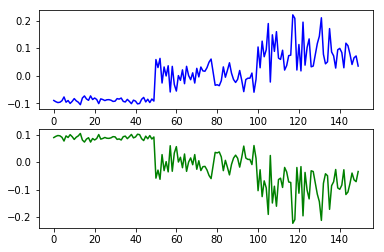

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

#first eigenvector
plt.subplot(2,1,1)
plt.plot(kpca0_eigen_vecs[:,0], c='blue')
plt.subplot(2,1,2)
plt.plot(eigen_vecs_for_comparison[:,0], c='green')

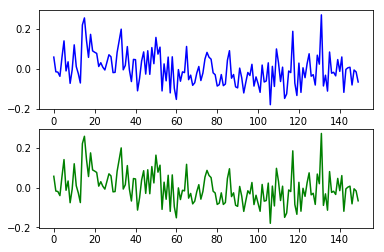

In [14]:
#Second eigenvector
plt.subplot(2,1,1)
plt.plot(kpca0_eigen_vecs[:,1], c='blue')
plt.subplot(2,1,2)
plt.plot(eigen_vecs_for_comparison[:,1], c='green')

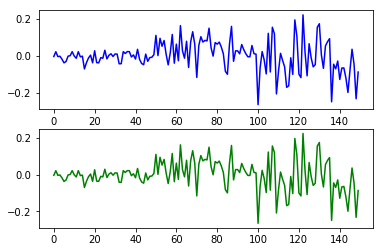

In [15]:
#Third eigenvector
plt.subplot(2,1,1)
plt.plot(kpca0_eigen_vecs[:,2], c='blue')
plt.subplot(2,1,2)
plt.plot(eigen_vecs_for_comparison[:,2], c='green')

■ For any data point(new or old), we can represent it as linear combination form

Kernel PCA의 결과는 다음의 식으로 구할 수 있다.
\begin{align}
y_{k}(x) = \phi(x)^{T}v_{k} = \sum_{i=1}^n \alpha_{ki}\tilde{\mathbf{K}}(x,x_i)
\end{align}


In [16]:
# transform data
n_components = 2

transformed_data = []
for j in range(n):
    loc = np.zeros(n_components)
    for k in range(n_components):
        inner_prod_sum = 0.
        for i in range(n):
            inner_prod_sum += eigen_pairs[k][1][i] * gram[j,i]
        loc[k] = inner_prod_sum/np.sqrt(eigen_pairs[k][0])
    transformed_data.append(loc)    
    
transformed_data = np.array(transformed_data)

feature space에 사영(projection) 된 데이터 포인트를 플랏에 찍어보면 다음과 같다.

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


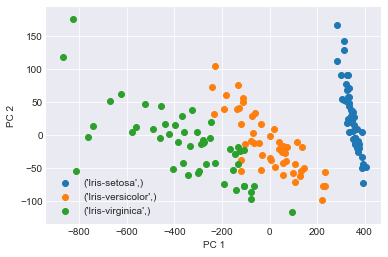

In [17]:
label = df['class'].unique()
print(label)

with plt.style.context("seaborn-darkgrid"):
    for l in zip(label):
        plt.scatter(transformed_data[y==l,0], transformed_data[y==l,1],
                    label=l)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.legend()
    plt.show()

scikit learn의 KernelPCA로부터 얻은 결과는 다음과 같다.

In [18]:
kpca0 = KernelPCA(n_components=2, kernel='poly')
Y = kpca0.fit_transform(X)

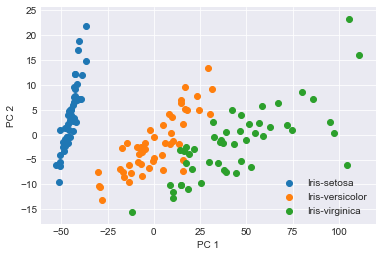

In [19]:
with plt.style.context("seaborn-darkgrid"):  
    for l in label:
        plt.scatter(Y[y==l,0], Y[y==l,1],label=l)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.legend()
    plt.show()

Kernel을 적용하지 않은 PCA에 의한 구분은 어떻게 나오는지 확인해보자.

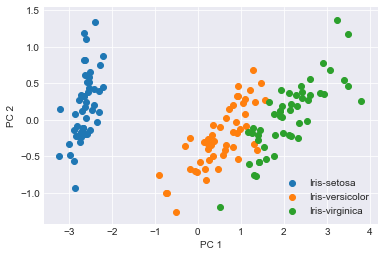

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Y_ = pca.fit_transform(X)

with plt.style.context("seaborn-darkgrid"):  
    for l in label:
        plt.scatter(Y_[y==l,0], Y_[y==l,1],label=l)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.legend()
    plt.show()